Importing all Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Loading the Dataset

In [20]:
df = pd.read_csv("sales_data.csv")
df.head(20)

,Date,Product,Region,Units_Sold,Unit_Price,Total_Sales
0,2023-01-31,Monitor,North,8,800,6400
1,2023-01-31,Keyboard,East,3,314,942
2,2023-01-31,Tablet,East,8,472,3776
3,2023-01-31,Monitor,West,8,230,1840
4,2023-01-31,Mouse,North,2,443,886
5,2023-01-31,Monitor,South,6,485,2910
6,2023-01-31,Monitor,North,1,559,559
7,2023-01-31,Phone,South,9,660,5940
8,2023-01-31,Tablet,East,3,975,2925
9,2023-01-31,Monitor,West,9,230,2070


Observing the Datatypes of the CSV File

In [6]:
print(df.dtypes)

Date           object
Product        object
Region         object
Units_Sold      int64
Unit_Price      int64
Total_Sales     int64
dtype: object


Finding out the Null Values for cleaning the Data

In [7]:
print(df.isnull().sum())

Date           0
Product        0
Region         0
Units_Sold     0
Unit_Price     0
Total_Sales    0
dtype: int64


Converting the Datetype of "Date" Column from object to datetime

In [8]:
df["Date"] = pd.to_datetime(df["Date"])

In [9]:
print(df.dtypes)

Date           datetime64[ns]
Product                object
Region                 object
Units_Sold              int64
Unit_Price              int64
Total_Sales             int64
dtype: object


Bar of Chart of Total Sales per Month

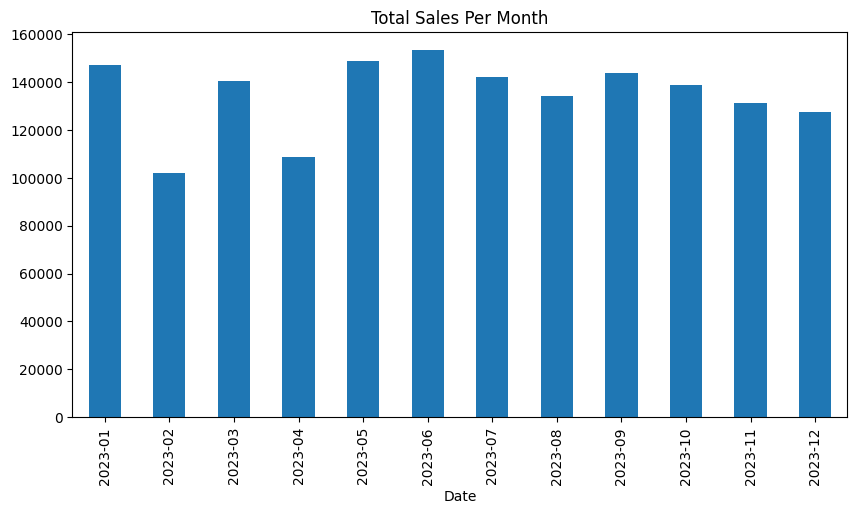

In [10]:
monthly_sales = df.groupby(df["Date"].dt.to_period("M"))["Total_Sales"].sum()

monthly_sales.plot(kind='bar',title='Total Sales Per Month',figsize=(10,5))
plt.show()

Bar Chart of Top Selling Products

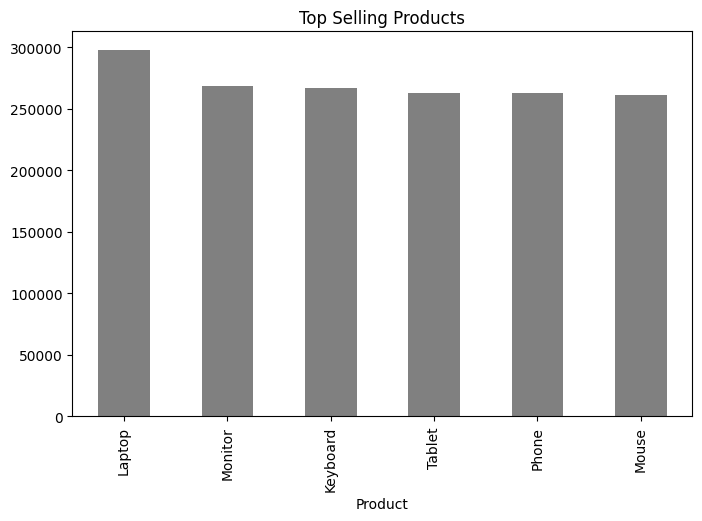

In [12]:
product_sales = df.groupby("Product")["Total_Sales"].sum().sort_values(ascending=False)

product_sales.plot(kind='bar',title='Top Selling Products',color='grey',figsize=(8,5))
plt.show()

Bar Chart of Total Sales by Region

C:\Users\Sadid\AppData\Local\Temp\ipykernel_10444\1714552746.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_sales, x='Region',y='Total_Sales',palette='viridis')


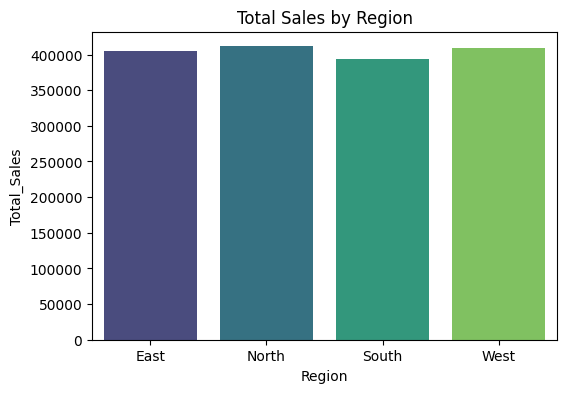

In [15]:
region_sales = df.groupby("Region")["Total_Sales"].sum().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=region_sales, x='Region',y='Total_Sales',palette='viridis')
plt.title("Total Sales by Region")
plt.show()

Heatmap of Monthly Sales by Region

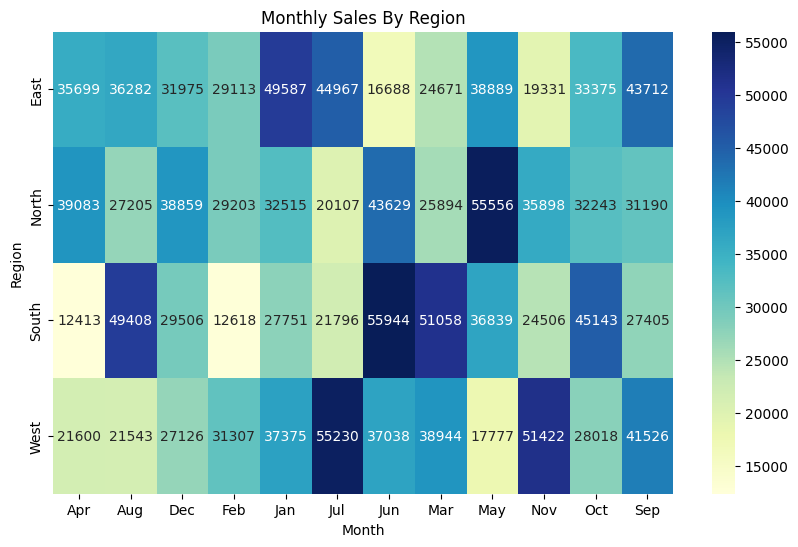

In [18]:
heatmap_data = df.copy()
heatmap_data["Month"] = heatmap_data["Date"].dt.strftime("%b")

pivot = heatmap_data.pivot_table(values='Total_Sales',index='Region',columns='Month',aggfunc='sum')

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt='.0f',cmap='YlGnBu')
plt.title("Monthly Sales By Region")
plt.show()